# Preparation

In [163]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [164]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [165]:
print("Data dims : ", data.shape)

Data dims :  (1460, 81)


# Problem 1

## a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.

In [255]:
SalePrice = pd.DataFrame(data['SalePrice'])  # Response
GrLivArea = pd.DataFrame(data['GrLivArea'])  # Predictor

#### Train and Test datasets

In [167]:
GrLivArea_train, GrLivArea_test, SalePrice_train, SalePrice_test = train_test_split(GrLivArea, SalePrice, test_size = 0.2)

# Check the sample sizes
print("Train Set :", GrLivArea_train.shape, SalePrice_train.shape)
print("Test Set  :", GrLivArea_test.shape, SalePrice_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


In [168]:
# Create a Linear Regression object
linreg = LinearRegression()

In [169]:
# Train the Linear Regression model
linreg.fit(GrLivArea_train, SalePrice_train)

LinearRegression()

In [170]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [18356.62596377]
Coefficients 	: a =  [[107.27924573]]


#### Plot Regression line on Train set

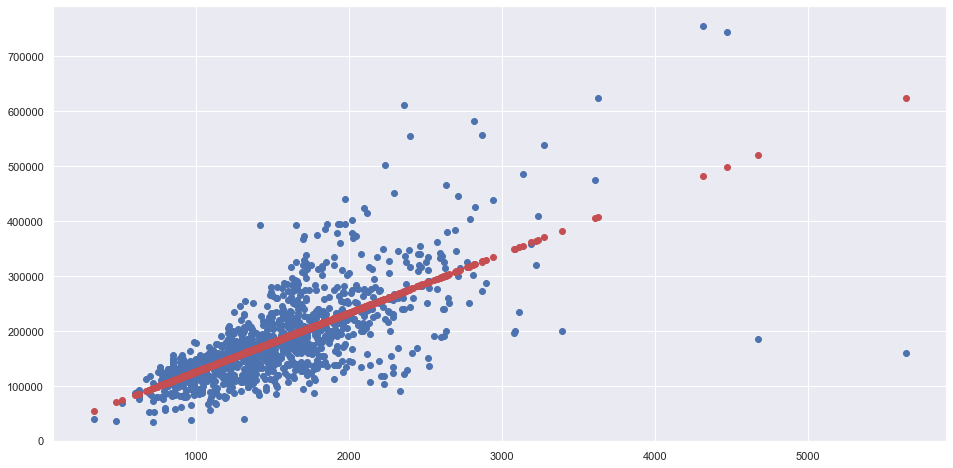

In [171]:
# Predict SalePrice values corresponding to GrLivArea Train
SalePrice_train_pred = linreg.predict(GrLivArea_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_train, SalePrice_train)
plt.scatter(GrLivArea_train, SalePrice_train_pred, color = "r")
plt.show()

---

## b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.

#### Check Goodness of Fit on Train set

In [172]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(GrLivArea_train, SalePrice_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(SalePrice_train, SalePrice_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(SalePrice_train, SalePrice_train_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.49491884163428534
Mean Squared Error (MSE) 	: 3305353479.3995504
Root Mean Squared Error (RMSE) 	: 57492.20364014194



#### Plot Regression Line on Test Set

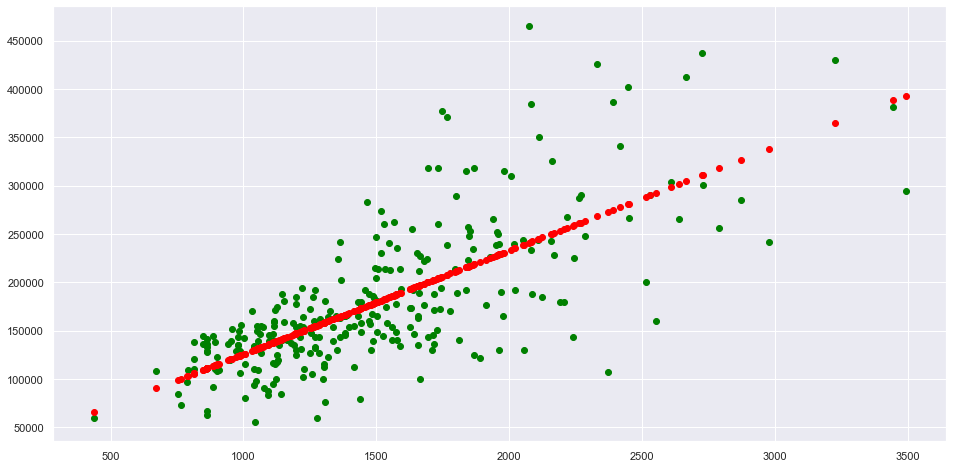

In [173]:
# Predict SalePrice values corresponding to GrLivArea Test
SalePrice_test_pred = linreg.predict(GrLivArea_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_test, SalePrice_test, color = "green")
plt.scatter(GrLivArea_test, SalePrice_test_pred, color = "red")
plt.show()

#### Goodness of Fit on Test Set

In [174]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(GrLivArea_test, SalePrice_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(SalePrice_test, SalePrice_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(SalePrice_test, SalePrice_test_pred)))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5367630901113636
Mean Squared Error (MSE) 	: 2477833590.478606
Root Mean Squared Error (RMSE) 	: 49777.84236463656



---

---

# Problem 2

## Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.

In [175]:
TotalBsmtSF = pd.DataFrame(data['TotalBsmtSF'])
GarageArea = pd.DataFrame(data['GarageArea'])

In [176]:
def LinearRegModel(variable, response):
    variable_train, variable_test, response_train, response_test = train_test_split(variable, response, test_size = 0.2)

    # Check the sample sizes
    print("Train Set :", variable_train.shape, response_train.shape)
    print("Test Set  :", variable_test.shape, response_test.shape)
    
    linreg = LinearRegression()
    linreg.fit(variable_train, response_train)
    
    # Coefficients of the Linear Regression line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    # Predict response values corresponding to variable Train
    response_train_pred = linreg.predict(variable_train)

    # Plot the Linear Regression lines
    print("Plot the Linear Regression line on Train set:")
    f = plt.figure(figsize=(16, 8))
    plt.scatter(variable_train, response_train)
    plt.scatter(variable_train, response_train_pred, color = "r")
    plt.show()
    
    print("Plot the Linear Regression line on Test set:")
    # Predict SalePrice values corresponding to GrLivArea Test
    response_test_pred = linreg.predict(variable_test)
    # Plot the Predictions
    f = plt.figure(figsize=(16, 8))
    plt.scatter(variable_test, response_test, color = "green")
    plt.scatter(variable_test, response_test_pred, color = "red")
    plt.show()
    
    # Import mean_squared_error from sklearn
    from sklearn.metrics import mean_squared_error

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(variable_train, response_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(response_train, response_train_pred))
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(response_train, response_train_pred)))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(variable_test, response_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(response_test, response_test_pred))
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(response_test, response_test_pred)))
    print()

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)
Intercept 	: b =  [62823.5686237]
Coefficients 	: a =  [[111.34689189]]
Plot the Linear Regression line on Train set:


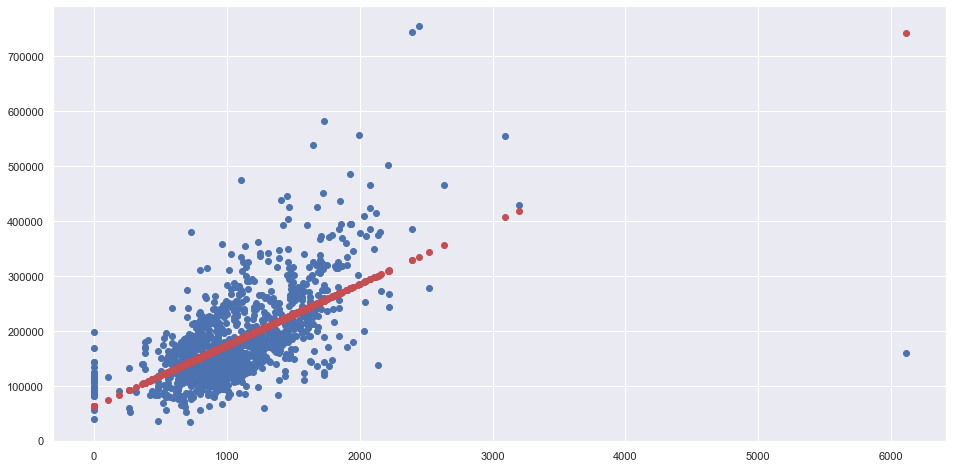

Plot the Linear Regression line on Test set:


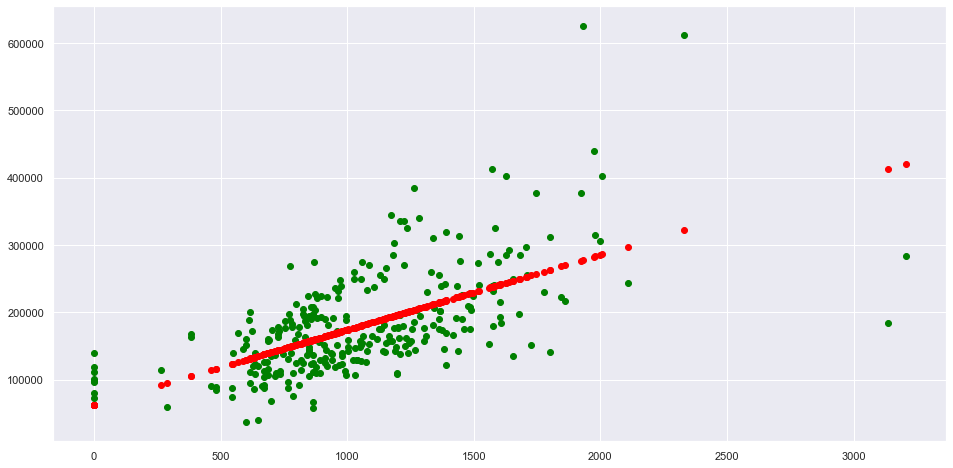

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3774732967851432
Mean Squared Error (MSE) 	: 3944456568.2590933
Root Mean Squared Error (RMSE) 	: 62804.9087911056

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3720558555212391
Mean Squared Error (MSE) 	: 3884871686.7503576
Root Mean Squared Error (RMSE) 	: 62328.73885095348



In [177]:
LinearRegModel(TotalBsmtSF,SalePrice)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)
Intercept 	: b =  [73249.63039392]
Coefficients 	: a =  [[228.27310288]]
Plot the Linear Regression line on Train set:


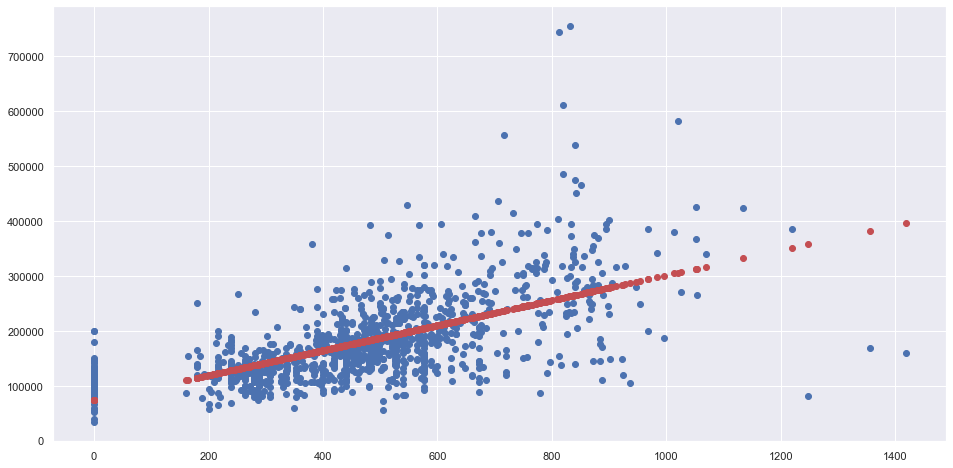

Plot the Linear Regression line on Test set:


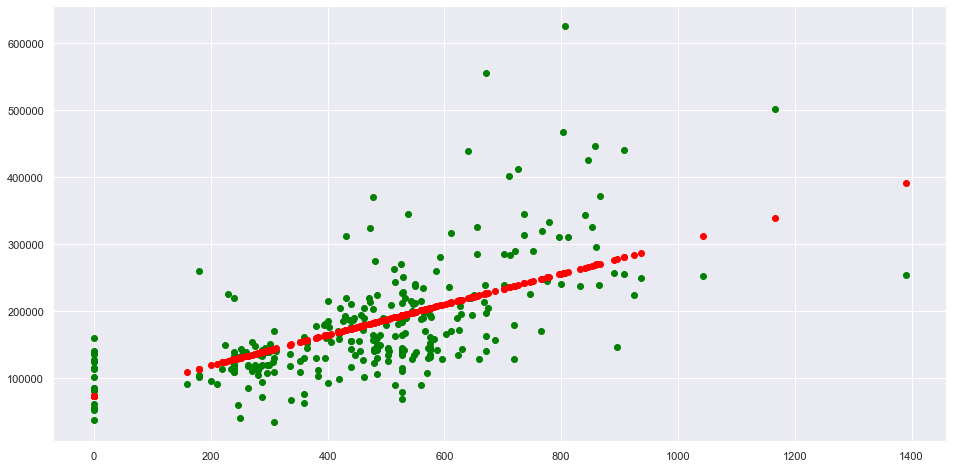

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3850500104228761
Mean Squared Error (MSE) 	: 3743814328.7268867
Root Mean Squared Error (RMSE) 	: 61186.716930448936

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3996097552423544
Mean Squared Error (MSE) 	: 4305529343.722314
Root Mean Squared Error (RMSE) 	: 65616.53254875873



In [178]:
LinearRegModel(GarageArea,SalePrice)

### Answer:

The model that uses GrLivArea to predict SalePrice is the best in this case.
<br>This model has the highest Explained Variance R^2, meaning it accounts the most for the data set's variations.
<br>This model also has the lowest RMSE, which means it deviates the least from the actual data points.
<br>Thus, the model in Problem 1 is the best in this case.

---

---

# Problem 3

## In this problem, you will consider finer details of the dataset and the variables to refine the model to predict SalePrice.

## (a) Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.

In [289]:
#List Outliers
def get_outlier_indexes(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indexes = df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)].index.tolist()
    return outlier_indexes

In [291]:
GrLivArea_outliers = get_outlier_indexes(GrLivArea, 'GrLivArea')
print(GrLivArea_outliers)

[58, 118, 185, 197, 231, 304, 324, 496, 523, 583, 608, 635, 691, 769, 798, 803, 961, 1024, 1031, 1046, 1142, 1169, 1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1386]


In [292]:
SalePrice_outliers = get_outlier_indexes(SalePrice, 'SalePrice')
print(SalePrice_outliers)

[11, 53, 58, 112, 151, 161, 178, 185, 224, 231, 278, 309, 313, 320, 321, 336, 349, 378, 389, 440, 473, 477, 481, 496, 515, 527, 585, 591, 608, 642, 644, 654, 661, 664, 678, 688, 691, 702, 718, 769, 774, 798, 803, 825, 877, 898, 987, 990, 1046, 1142, 1169, 1181, 1182, 1228, 1243, 1267, 1268, 1353, 1373, 1388, 1437]


In [293]:
#union of outliers
outliers_indexes = GrLivArea_outliers + SalePrice_outliers
print(outliers_indexes)

[58, 118, 185, 197, 231, 304, 324, 496, 523, 583, 608, 635, 691, 769, 798, 803, 961, 1024, 1031, 1046, 1142, 1169, 1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1386, 11, 53, 58, 112, 151, 161, 178, 185, 224, 231, 278, 309, 313, 320, 321, 336, 349, 378, 389, 440, 473, 477, 481, 496, 515, 527, 585, 591, 608, 642, 644, 654, 661, 664, 678, 688, 691, 702, 718, 769, 774, 798, 803, 825, 877, 898, 987, 990, 1046, 1142, 1169, 1181, 1182, 1228, 1243, 1267, 1268, 1353, 1373, 1388, 1437]


In [298]:
GrLivArea_clean = GrLivArea.drop(index = outliers_indexes)
GrLivArea_clean.head()

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198


In [299]:
SalePrice_clean = SalePrice.drop(index = outliers_indexes)
SalePrice_clean.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


## (b) In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.
## AND
## (c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.

Train Set : (1106, 1) (1106, 1)
Test Set  : (277, 1) (277, 1)
Intercept 	: b =  [35738.80168642]
Coefficients 	: a =  [[91.54007094]]
Plot the Linear Regression line on Train set:


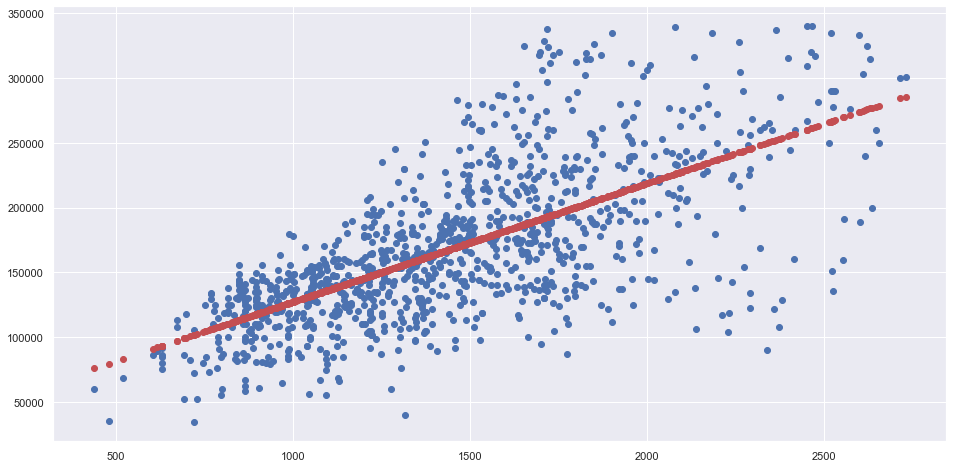

Plot the Linear Regression line on Test set:


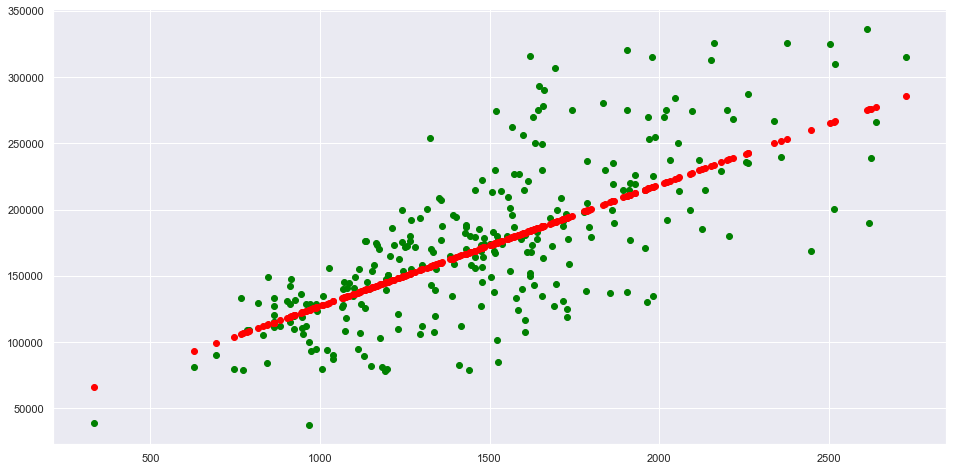

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.463957567172119
Mean Squared Error (MSE) 	: 1826826283.3759744
Root Mean Squared Error (RMSE) 	: 42741.38841188918

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5227267726295115
Mean Squared Error (MSE) 	: 1694500873.0010598
Root Mean Squared Error (RMSE) 	: 41164.31552936426



In [300]:
LinearRegModel(GrLivArea_clean,SalePrice_clean)

## Answer:

This model is better than the one in Problem 1 for the same variables.
<br>This model has the highest Explained Variance R^2, meaning it accounts the most for the data set's variations.
<br>This model also has the lowest RMSE, which means it deviates the least from the actual data points.
<br>Thus, this model is better.